<a href="https://colab.research.google.com/github/smojumder018/SUPREME/blob/main/2.1%20FFNN_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedforward Neural Network with PyTorch
## About Feedforward Neural Network

### Non-linear activation function

- Function: takes a number & perform mathematical operation
- Common Types of Non-linearity
    - ReLUs (Rectified Linear Units)      
    - Sigmoid     
    - Tanh

#### Sigmoid (Logistic)
- $\sigma(x) = \frac{1}{1 + e^{-x}}$
- Input number $\rightarrow$ [0, 1]
    - Large negative number $\rightarrow$ 0
    - Large positive number $\rightarrow$ 1
- Cons:
    1. Activation saturates at 0 or 1 with **gradients $\approx$ 0**
        - No signal to update weights $\rightarrow$ **cannot learn**
        - Solution: Have to carefully initialize weights to prevent this
    2. Outputs not centered around 0
        - If output always positive $\rightarrow$ gradients always positive or negative $\rightarrow$ **bad for gradient updates**

#### Tanh
- $\tanh(x) = 2 \sigma(2x) -1$
    - A scaled sigmoid function
- Input number $\rightarrow$ [-1, 1]
- Cons:
    1. Activation saturates at 0 or 1 with **gradients $\approx$ 0**
        - No signal to update weights $\rightarrow$ **cannot learn**
        - **Solution**: Have to carefully initialize weights to prevent this


#### ReLUs
- $f(x) = \max(0, x)$
- Pros:
    1. Accelerates convergence $\rightarrow$ **train faster**
    2. **Less computationally expensive operation** compared to Sigmoid/Tanh exponentials
- Cons:
    1. Many ReLU units "die" $\rightarrow$ **gradients = 0** forever
        - **Solution**: careful learning rate choice
      


##  What is PyTorch?

**PyTorch** is an open-source deep learning library developed by Facebook.



###  Key Features:

- **Easy to use**: Pythonic and intuitive
- **Dynamic computation graph**: Builds the graph on the fly (great for debugging)
- **GPU support**: Use CUDA for fast training
- **Strong community**: Well-documented and widely used in research



###  Core Components:

- `Tensor`: Like NumPy arrays, but with GPU support
- `autograd`: Automatically calculates gradients
- `nn.Module`: For building neural networks
- `optimizer`: Updates weights (e.g., SGD, Adam)
- `loss function`: Measures how wrong the model is (e.g., CrossEntropy)


In [27]:
from google.colab import drive
drive._mount('/content/drive')

import os
project_path = '/content/drive/MyDrive/SUPREME/FFNN/'
os.chdir(project_path)

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Scaling

 Neural networks are sensitive to the scale of input data.
 If one feature ranges from 0 to 1 and another from 0 to 10,000,
 the model might give more importance to the feature with the larger range,
 simply due to its magnitude.

 Scaling helps:

  -Ensure all features contribute equally to the learning process.

 -Speed up convergence during training (faster and more stable).

  -Prevent issues in gradient-based optimization (e.g., vanishing gradients).

 -Keep input values in the ideal operating range of activation functions (like sigmoid, tanh, ReLU).


 MinMaxScaler from sklearn scales each feature to a specified range (default is [0, 1]).

MinMax Scaling Formula:
$$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$


This ensures that the smallest value becomes 0 and the largest becomes 1,
and all other values are proportionally scaled in between.


#Transforms
Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -transform to modify the features and target_transform to modify the labels

- ToTensor() converts images into FloatTensor and scales the pixel values [0,1]

In [28]:
# Load and preprocess data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

data_in = pd.read_csv('Ind_data_in.csv')
data_out = pd.read_csv('Ind_data_out.csv')

X_all = scaler_X.fit_transform(np.array(data_in))
y_all = scaler_y.fit_transform(np.array(data_out))


X = X_all[:130, :]
y = y_all[:130, :]

In [29]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)


In [30]:

# Create dataset and split
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=10, shuffle=True)
val_loader = DataLoader(val_set, batch_size=10)

#Define Class
We define our neural network by subclassing nn.Module, and initialize the neural network layers in _init_. Every nn.Module subclass implements the operations on input data in the forward method.

#Model Layers
- nn.Linear - The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.
- nn.ReLU - Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity.
- nn.Sequential - The data is passed through all the modules in the same order as defined.

In [42]:
# Define model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 20),  #takes the data input and outputs 20 values
            nn.ReLU(),           #Activation function - allows for non linearity
            nn.Linear(20, 20),
            nn.ReLU(),         #Activation - non linear
            nn.Linear(20, 1), #Reduces output to one prediction

        )

    def forward(self, x): #tells how the input should flow through - goes forward through the model
        return self.net(x)

model = SimpleNN(X.shape[1])
print(model)

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

SimpleNN(
  (net): Sequential(
    (0): Linear(in_features=4, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)
Layer: net.0.weight | Size: torch.Size([20, 4]) | Values : tensor([[-0.2363, -0.0850, -0.4026, -0.3634],
        [-0.1622,  0.3547,  0.2535, -0.4546]], grad_fn=<SliceBackward0>) 

Layer: net.0.bias | Size: torch.Size([20]) | Values : tensor([-0.1521, -0.0913], grad_fn=<SliceBackward0>) 

Layer: net.2.weight | Size: torch.Size([20, 20]) | Values : tensor([[ 0.0814, -0.1231,  0.2113,  0.0138,  0.1821, -0.0396,  0.1085, -0.1602,
          0.0166, -0.2068, -0.0853, -0.0274, -0.0734,  0.0167, -0.1020, -0.1522,
          0.0618,  0.1016, -0.2234, -0.0807],
        [-0.1828,  0.1455,  0.0676,  0.1032, -0.0479,  0.0080, -0.1205, -0.2188,
          0.0838,  0.0889, -0.1017,  0.1434,  0.0915,  0.0182,  0.0592,  0.1452,
          0.2220, -0.0477, -0.1493

Layer 1: weight matrix for the first layer

Layer 2: bias vector for the first layer

Layer 3: weight matrix for the second layer

Layer 4: Biases for second layer

Layer 5: Final layer reducing down to one output

Layer 6: Single bias value for the final output

SliceBackward0 - gradients will be computed for the computation graph during backpropagation. These parameters are being tracked for learning, they'll get updated during training.

In [37]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



SimpleNN(
  (net): Sequential(
    (0): Linear(in_features=4, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)


In [38]:
# Training loop
epochs = 200
train_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        output = model(xb)
        loss = criterion(output, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {train_losses[-1]:.6f}")

Epoch [20/200], Loss: 0.007275
Epoch [40/200], Loss: 0.000628
Epoch [60/200], Loss: 0.000076
Epoch [80/200], Loss: 0.000019
Epoch [100/200], Loss: 0.000011
Epoch [120/200], Loss: 0.000010
Epoch [140/200], Loss: 0.000008
Epoch [160/200], Loss: 0.000006
Epoch [180/200], Loss: 0.000005
Epoch [200/200], Loss: 0.000005


In [39]:
# Predict
model.eval()
with torch.no_grad():
    y_pred = model(X_tensor).numpy()

y_pred_inv = scaler_y.inverse_transform(y_pred)
y_true_inv = scaler_y.inverse_transform(y)

# Metrics
print("Mean absolute error: {:.6f}".format(mean_absolute_error(y_true_inv, y_pred_inv)))
print("Mean squared error: {:.6f}".format(mean_squared_error(y_true_inv, y_pred_inv)))
print("R-Squared: {:.2f}".format(r2_score(y_true_inv, y_pred_inv)))

# Save model
torch.save(model.state_dict(), "Indentation_model.pth")

Mean absolute error: 0.002266
Mean squared error: 0.000010
R-Squared: 1.00


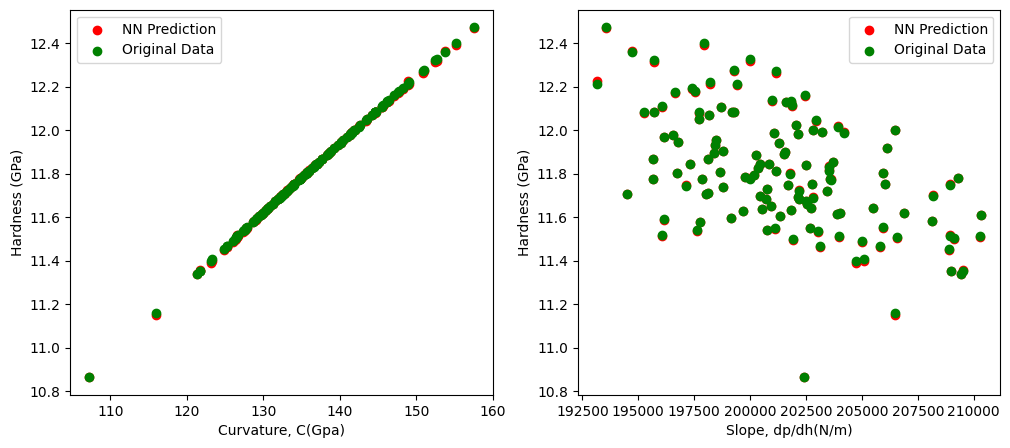

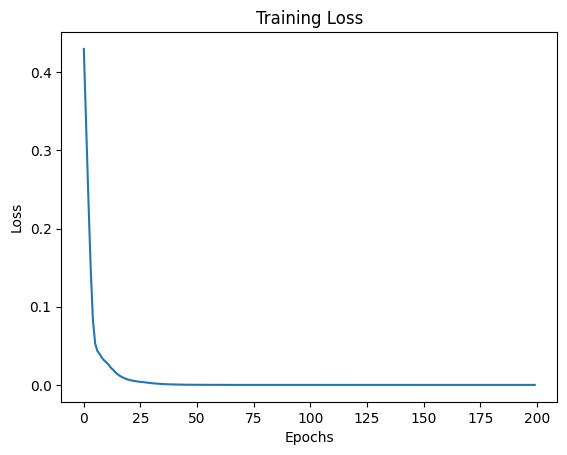

In [40]:
x_data = scaler_X.inverse_transform(X)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_data[:, 0], y_pred_inv[:, 0], color='r')
plt.scatter(x_data[:, 0], y_true_inv[:, 0], color='g')
plt.xlabel('Curvature, C(Gpa)')
plt.ylabel('Hardness (GPa)')
plt.legend(['NN Prediction', 'Original Data'])

plt.subplot(1, 2, 2)
plt.scatter(x_data[:, 1], y_pred_inv[:, 0], color='r')
plt.scatter(x_data[:, 1], y_true_inv[:, 0], color='g')
plt.xlabel('Slope, dp/dh(N/m)')
plt.ylabel('Hardness (GPa)')
plt.legend(['NN Prediction', 'Original Data'])
plt.show()

# Loss curve
plt.plot(train_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

## Practice

Activation Function - Change nn.Relu to --> nn.Tanh and nn.sigmoid

Number of Neurons - increase/decrease

Number of Epochs - increase/decrease

Add more layers - More activation/linear layers to the model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch [20/200], Loss: 0.026957
Epoch [40/200], Loss: 0.023930
Epoch [60/200], Loss: 0.019399
Epoch [80/200], Loss: 0.014205
Epoch [100/200], Loss: 0.007914
Epoch [120/200], Loss: 0.004358
Epoch [140/200], Loss: 0.002804
Epoch [160/200], Loss: 0.001947
Epoch [180/200], Loss: 0.001428
Epoch [200/200], Loss: 0.000931
Mean absolute error: 0.037303
Mean squared error: 0.002310
R-Squared: 0.97


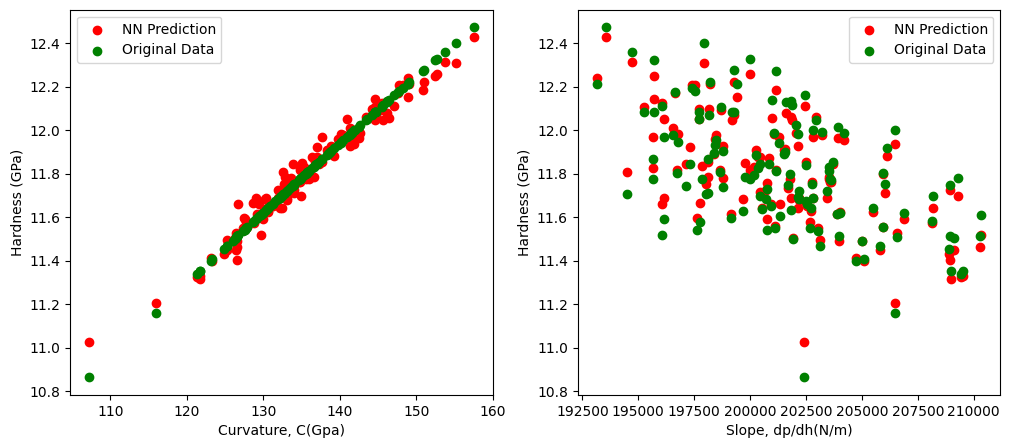

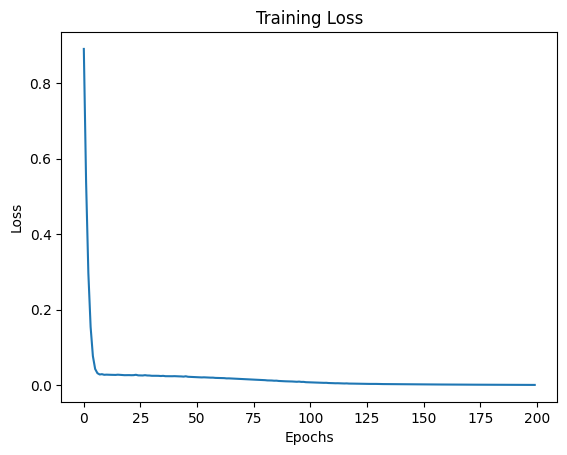

In [44]:

from google.colab import drive
drive._mount('/content/drive')

import os
project_path = '/content/drive/MyDrive/SUPREME/FFNN/'
os.chdir(project_path)

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split


# Load and preprocess data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

data_in = pd.read_csv('Ind_data_in.csv')
data_out = pd.read_csv('Ind_data_out.csv')

X_all = scaler_X.fit_transform(np.array(data_in))
y_all = scaler_y.fit_transform(np.array(data_out))


X = X_all[:130, :]
y = y_all[:130, :]

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Create dataset and split
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=10, shuffle=True)
val_loader = DataLoader(val_set, batch_size=10)

# Define model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 20),  #takes the data input and outputs 20 values
            nn.Sigmoid(),           #Activation function - allows for non linearity
            nn.Linear(20, 20),
            nn.Sigmoid(),         #Activation - non linear
            nn.Linear(20, 1), #Reduces output to one prediction

        )

    def forward(self, x): #tells how the input should flow through - goes forward through the model
        return self.net(x)

model = SimpleNN(X.shape[1])

    # Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 200
train_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        output = model(xb)
        loss = criterion(output, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {train_losses[-1]:.6f}")

# Predict
model.eval()
with torch.no_grad():
    y_pred = model(X_tensor).numpy()

y_pred_inv = scaler_y.inverse_transform(y_pred)
y_true_inv = scaler_y.inverse_transform(y)

# Metrics
print("Mean absolute error: {:.6f}".format(mean_absolute_error(y_true_inv, y_pred_inv)))
print("Mean squared error: {:.6f}".format(mean_squared_error(y_true_inv, y_pred_inv)))
print("R-Squared: {:.2f}".format(r2_score(y_true_inv, y_pred_inv)))

# Save model
torch.save(model.state_dict(), "Indentation_model.pth")


x_data = scaler_X.inverse_transform(X)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_data[:, 0], y_pred_inv[:, 0], color='r')
plt.scatter(x_data[:, 0], y_true_inv[:, 0], color='g')
plt.xlabel('Curvature, C(Gpa)')
plt.ylabel('Hardness (GPa)')
plt.legend(['NN Prediction', 'Original Data'])

plt.subplot(1, 2, 2)
plt.scatter(x_data[:, 1], y_pred_inv[:, 0], color='r')
plt.scatter(x_data[:, 1], y_true_inv[:, 0], color='g')
plt.xlabel('Slope, dp/dh(N/m)')
plt.ylabel('Hardness (GPa)')
plt.legend(['NN Prediction', 'Original Data'])
plt.show()

# Loss curve
plt.plot(train_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Summary

- **Types** of Activation functions
    - Sigmoid
    - Tanh
    - ReLU

- Ways to Expand Model’s **Capacity**
    - More non-linear activation units (**neurons**)
    - More hidden **layers**
- **Cons** of Expanding Capacity
    - Need more **data**
    - Does not necessarily mean higher **accuracy**